In [ ]:
!pip install plsa

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.corpus import stopwords

In [ ]:
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import re

In [ ]:
# Code partially sourced from: https://github.com/yedivanseven/PLSA/blob/master/notebooks/Examples.ipynb
# Documentation: https://probabilistic-latent-semantic-analysis.readthedocs.io/en/latest/

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA


from google.colab import drive
drive.mount('/content/gdrive')
grievances_df = pd.read_csv('/content/gdrive/MyDrive/DATA/palm_oil_grievance_logs.csv')
grievances_df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,pk,source,internal_id,status,submitted_on,accepted_on,last_updated_on,country,region,complainants,respondents,respondent_sector,respondent_parent_company,respondent_supplier,summary,history,external_link,extras
0,1,Roundtable on Sustainable Palm Oil (RSPO),500Mg00000L0di6IAB,Closed,2/26/2025,4/15/2025,5/20/2025,Indonesia,Sumatera Selatan,Confidential,PT Sawit Mas Sejahtera,Oil Palm Growers,Golden Agri-Resources (GAR),NaN,That the Respondent allegedly transferred the ...,2025-05-20: CP's Decision Letter dated 20. 05....,https://rspo.my.site.com/Complaint/s/case/500M...,{'case_number': 'RSPO/2025/02/RR'}
1,2,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVwYqYAK,In Progress - Investigation,11/29/2024,1/16/2025,1/16/2025,Mexico,NaN,Confidential,INDUSTRIAS OLEOPALMA S.A. DE C.V.,Oil Palm Growers,Oleoquímica Mexicana S.A. de C.V.,NaN,The Complainant alleges that the Respondent ha...,2025-04-30: The Secretariat furnished the Resp...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/17/MAM'}
2,3,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVxmPYAS,In Progress - Investigation,11/28/2024,1/21/2025,1/21/2025,Colombia,Montes de María,Confidential,OLEOFLORES S A S,Processors and/or Traders,Musim Mas Holdings Pte.,NaN,1.The Complainant alleges that the Respondent ...,2025-04-30: The Complaints Panels directive to...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/18/HN'}
3,4,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVGg2YAG,In Progress - Investigation,10/16/2024,11/18/2024,11/18/2024,Indonesia,Riau,S. Samsul Hadi,PT Guntung Idamannusa,Oil Palm Growers,Compañía Industrial Aceitera Coto Cincuenta y ...,NaN,The Respondent's Corporate Social Responsibili...,2025-04-30: The Complaints Panel has directed ...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/14/RH'}
4,5,Roundtable on Sustainable Palm Oil (RSPO),500GB00003vMwFgYAK,In Progress - Investigation,9/11/2024,10/29/2024,10/29/2024,Costa Rica,Pococi/Limón,Confidential,Compañía Palma Tica S.A.,Oil Palm Growers,NaN,NaN,The Complainant alleges that the Respondent br...,2025-04-30: The Briefing Note is in progress. ...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/13/MAM'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,426,Wilmar International,NaN,Closed,8/19/2015,NaN,NaN,NaN,NaN,Greenomics Indonesia,"Sumatra Jaya Agro Lestari (SJAL), a subsidiary...",NaN,NaN,NaN,Alleged construction of canal to prepare for d...,Dialogue initiated with PT Sumatra Jaya Agro L...,http://www.greenomics.org/docs/IPOP_Implementa...,NaN
426,427,Wilmar International,NaN,Closed,7/1/2015,NaN,NaN,NaN,NaN,Greenomics Indonesia,"Patiware, a subsidiary of GAMA Plantation",NaN,NaN,NaN,NaN,Dialogue initiated with Ganda Group on the fir...,http://www.greenomics.org/docs/The%20Grievance...,NaN
427,428,Wilmar International,NaN,Closed,5/30/2015,NaN,NaN,NaN,NaN,Action Network - Forest Heroes,Setia Agrindo Lestari (SAL) an affiliate* of F...,NaN,NaN,NaN,NaN,Dialogue initiated with First Resources in the...,https://www.thejakartapost.com/news/2015/05/12...,NaN
428,429,Wilmar International,NaN,Closed,6/5/2015,NaN,NaN,NaN,NaN,Greenomics Indonesia,Sawit Sumbermas Sarana (SSS),NaN,NaN,NaN,Alleged clearance of potential High Carbon Sto...,Following a couple of NGO reports about Sawit ...,http://www.greenomics.org/docs/IPOP_Implementa...,NaN


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Add custom stopwords

stopwords_extra = ['pt','report','rspo','alleged', 'palm', 'oil', 'company', 'community', 'complainant',
                   'companies', 'also', 'without', 'group', 'allegedly', 'period', 'respondent', 'reported',
                   'mentioned', '2019', '19', '2020', 'subsidary', 'alleges']

from nltk.corpus import stopwords
stop = set(stopwords.words('english') + stopwords_extra)
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop]

In [ ]:
pipeline = Pipeline(*DEFAULT_PIPELINE, remove_stopwords)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover
9: remove_stopwords

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:

from plsa.pipeline import DEFAULT_PIPELINE
from plsa import Pipeline, Corpus
from nltk.util import ngrams
from nltk.corpus import stopwords

stopwords_extra = ['pt', 'report', 'rspo', 'alleged', 'palm', 'oil', 'company', 'community', 'complainant',
                   'companies', 'also', 'without', 'group', 'allegedly', 'period', 'respondent', 'reported',
                   'mentioned', '2019', '19', '2020', 'subsidary', 'alleges']

stop = set(stopwords.words('english') + stopwords_extra)

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop]


def keep_bigrams_only(tokens):
    bigrams = ['_'.join(gram) for gram in ngrams(tokens, 2)]
    return bigrams


pipeline = Pipeline(*(DEFAULT_PIPELINE + (remove_stopwords, keep_bigrams_only)))


In [ ]:

grievances_summary = grievances_df['summary'].dropna()
grievances_summary.to_csv('summary.csv', index=False)


corpus = Corpus.from_csv('summary.csv', pipeline)


from plsa.algorithms import PLSA

n_topics = 7
plsa = PLSA(corpus, n_topics)
result = plsa.fit()


In [ ]:
for i in range(n_topics):
    print(f"Topic {i}:")
    print(result.word_given_topic[i][:10])


Topic 0:
(('investigation_plantation', 0.007835646955768683), ('park_bukit', 0.005787284853409197), ('bukit_payung', 0.0039178234778843414), ('payung_mill', 0.0039178234778843414), ('plantation_publication', 0.0039178234778843414), ('hendana_plantation', 0.0039178234778843414), ('plantation_supra', 0.0039178234778843414), ('supra_jaya', 0.0039178234778843414), ('jaya_ptpn', 0.0039178234778843414), ('ptpn_sekar', 0.0039178234778843414))
Topic 1:
(('dharma_kahuripan', 0.004856709986424354), ('krida_dharma', 0.004856709986424354), ('rayatama_jaya', 0.004856709986424354), ('supply_chain', 0.004819178479106944), ('response_deforestation', 0.004636493276130422), ('labour_right', 0.004471280476124051), ('holder_grower', 0.004119568894843671), ('deforestation_supply', 0.004032327718358753), ('sumur_pandanwangi', 0.00345628090145036), ('muda_krida', 0.0033492774639510407))
Topic 2:
(('worker_worker', 0.0039027534129581058), ('wastewater_treatment', 0.0038283858339370888), ('hcv_assessment', 0.0

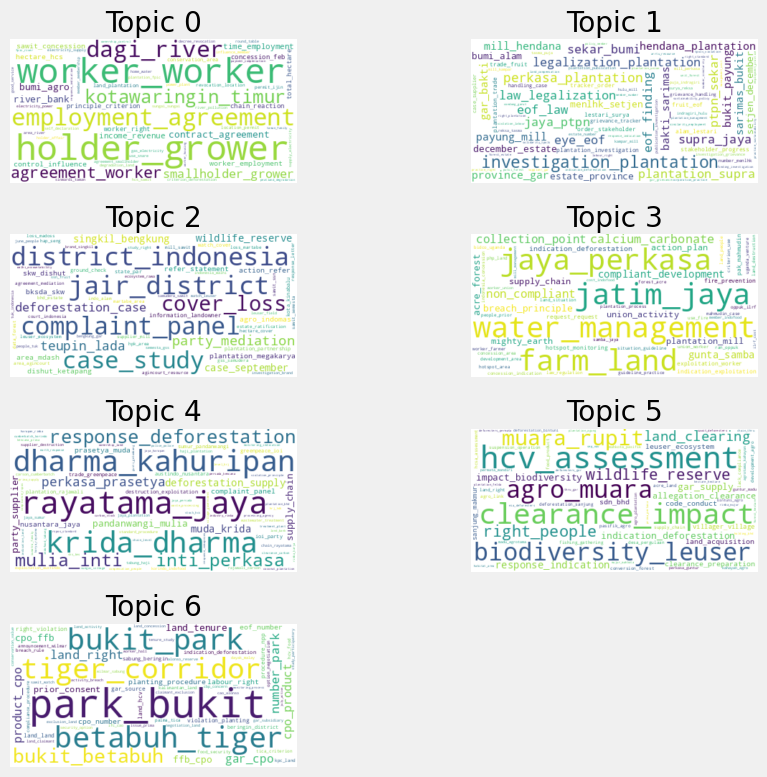

In [ ]:
from plsa import Visualize

visualize = Visualize(result)
fig = plt.figure(figsize=(10, 8))
_ = visualize.wordclouds(fig)


In [ ]:
result = plsa.fit()
plsa


PLSA:
====
Number of topics:     7
Number of documents:  387
Number of words:      7810
Number of iterations: 55

In [ ]:
result = plsa.best_of(10)
result

KeyboardInterrupt: 

In [ ]:
result.topic

array([0.17373323, 0.15151295, 0.13984197, 0.13841413, 0.13596648,
       0.13590858, 0.12462267])

In [ ]:
result.word_given_topic

((('investigation', 0.007231933701758826),
  ('plantation', 0.00715781992769918),
  ('mill', 0.006286043491724672),
  ('estate', 0.005300780242135624),
  ('investigation_plantation', 0.0051768993351499005),
  ('grievance', 0.005117954402132852),
  ('gar', 0.004941660811039867),
  ('eof', 0.004780934992971967),
  ('worker', 0.004241446746194047),
  ('union', 0.003907215522201754),
  ('number', 0.003303556321197098),
  ('bumi', 0.0032666820768905654),
  ('area', 0.0030855998936374822),
  ('kampar', 0.0030750387456059693),
  ('member', 0.0028562363631422353),
  ('perkasa_plantation', 0.002795489768732699),
  ('publication', 0.002795489768732699),
  ('hulu', 0.002795489768732699),
  ('gar_grievance', 0.002795489768732699),
  ('sarimas', 0.002795489768732699),
  ('finding', 0.0027920216339086144),
  ('unit', 0.0027920216339086144),
  ('province', 0.002722609483586584),
  ('december', 0.002679704286596353),
  ('supplier_gar', 0.0026722690763554668),
  ('puja', 0.0026127888274168685),
  ('ord

In [ ]:
result.tf_idf

True

In [ ]:
for x in range(0,7):
  print(f"Topic {x}:")
  print(result.word_given_topic[x][:10]) # First 10 words of topic x)


Topic 0:
(('investigation', 0.007231933701758826), ('plantation', 0.00715781992769918), ('mill', 0.006286043491724672), ('estate', 0.005300780242135624), ('investigation_plantation', 0.0051768993351499005), ('grievance', 0.005117954402132852), ('gar', 0.004941660811039867), ('eof', 0.004780934992971967), ('worker', 0.004241446746194047), ('union', 0.003907215522201754))
Topic 1:
(('land', 0.004455927303831748), ('area', 0.003466023263121026), ('right', 0.0031425365884054906), ('people', 0.0029754223484406133), ('plantation', 0.002892939420088289), ('individual', 0.0028062125688292075), ('greenpeace', 0.0027749267312339966), ('mediation', 0.002769978767867692), ('development', 0.0027632253491005187), ('operation', 0.002740204836757086))
Topic 2:
(('procedure', 0.004821205133723455), ('land', 0.0044440616388049786), ('certification', 0.004058933822222916), ('rspos', 0.0034747593692764553), ('planting', 0.003468679316224995), ('php', 0.0033962437406478327), ('hotspot', 0.00323171974040965

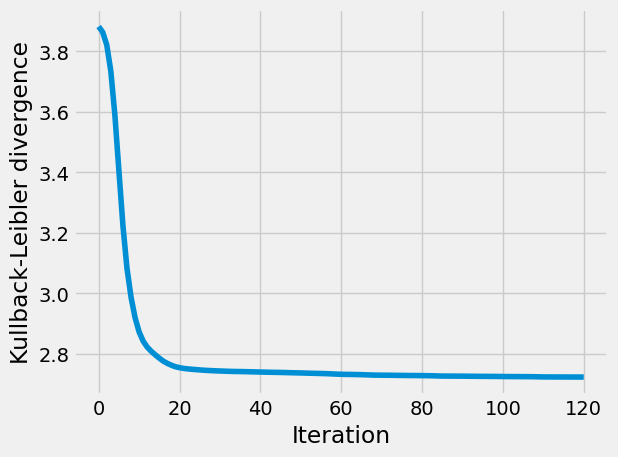

In [ ]:
# this divergence measures how much information is lost when using Q to approximate P.

fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()

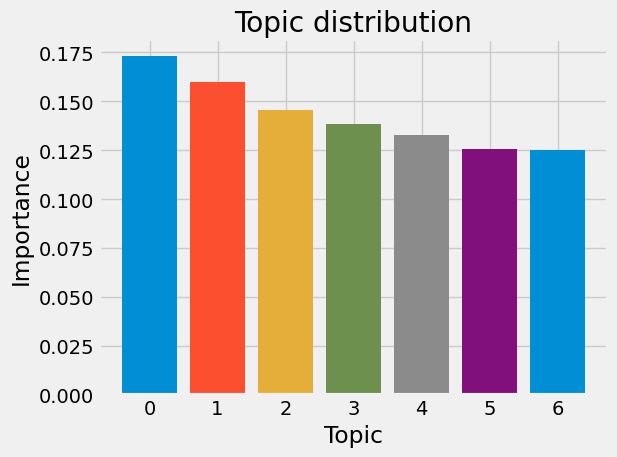

In [ ]:
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

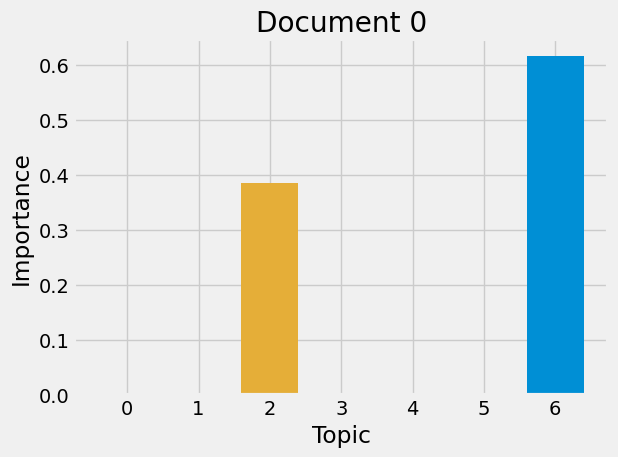

In [ ]:
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(0, ax) # change int to change doc
fig.tight_layout()

In [ ]:
result.topic_given_doc[2]

array([0., 0., 1., 0., 0., 0., 0.])

In [ ]:
from nltk.util import ngrams

# Step to convert list of tokens into bigrams
def add_bigrams(tokens):
    bigrams = ['_'.join(gram) for gram in ngrams(tokens, 2)]
    return tokens + bigrams  # Combine unigrams and bigrams

# Add `add_bigrams` to the pipeline
from plsa.pipeline import DEFAULT_PIPELINE
from plsa import Pipeline

pipeline = Pipeline(
    *DEFAULT_PIPELINE,
    add_bigrams  # Add custom bigram step at the end
)



In [ ]:
from plsa import Corpus

In [ ]:
from plsa.algorithms import PLSA

n_topics = 7
plsa = PLSA(corpus, n_topics)

result = plsa.fit()


In [ ]:
# Apply your bigram-enhanced pipeline correctly
texts = grievances_df['summary'].dropna().tolist()

processed_docs = [pipeline.process(text) for text in texts]

# Confirm bigrams are present
for i, doc in enumerate(processed_docs[:3]):
    print(f"Doc {i}:", doc)


TypeError: can only concatenate tuple (not "list") to tuple

In [ ]:
for x in range(n_topics):
    print(f"Topic {x}:")
    print(result.word_given_topic[x][:10])  # Top 10 terms (including bigrams!)


Topic 0:
(('land', 0.012889947345038738), ('cpo', 0.009578619995830737), ('park', 0.009264116343149312), ('ffb', 0.00863813967193598), ('village', 0.007810240869693754), ('principle', 0.007237248655540516), ('operation', 0.007184437938148487), ('leuser', 0.006764332367823071), ('area', 0.006584087268224708), ('wildlife', 0.006369483161731994))
Topic 1:
(('jaya', 0.011260738836020604), ('grower', 0.009646066640153814), ('fire', 0.008478495226659078), ('electricity', 0.008046553125386434), ('supply', 0.007742881568670986), ('holder', 0.0075004942136761635), ('indofood', 0.0074833883133882725), ('plant', 0.0074833883133882725), ('dharma', 0.007483388313388271), ('krida', 0.007483388313388271))
Topic 2:
(('indication', 0.01667890467742465), ('response', 0.015534266740718753), ('concession', 0.015021869239642532), ('deforestation', 0.013490753005290061), ('clearance', 0.010670166624588365), ('total', 0.009898470051376038), ('land', 0.009889794711344558), ('procedure', 0.009777118770950785),